Original Data:
     Region  Age  IncomeLevel PreferredProduct  SpendingScore
0    North   35        55000      Electronics             70
1    South   42        62000        Groceries             85
2     East   29        48000         Clothing             60
3     West   50        70000        Furniture             90
4  Central   38        59000        Groceries             75
5    North   33        53000      Electronics             68
6    South   45        64000        Groceries             88
7     East   31        47000         Clothing             58
8     West   48        68000        Furniture             92
9  Central   36        60000        Groceries             77


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, 

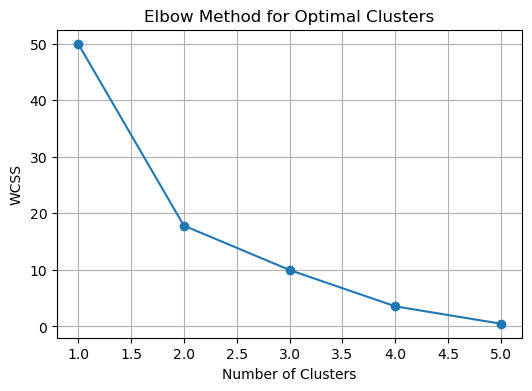

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


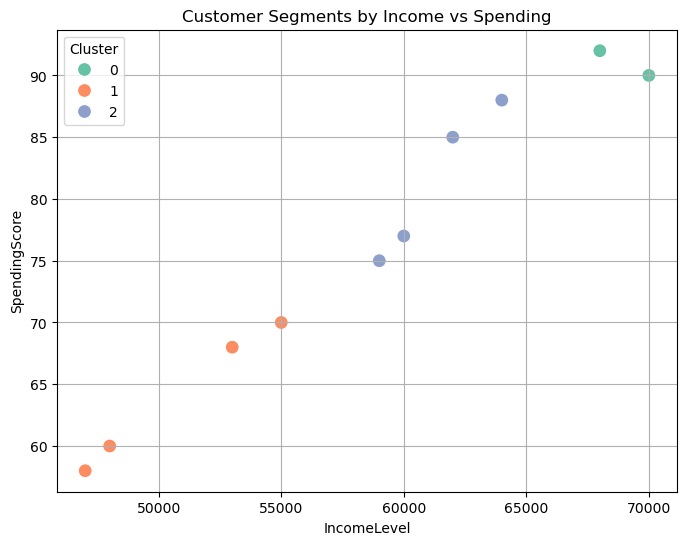


Cluster Summary (Grouped by Cluster):
           Age  IncomeLevel  SpendingScore
Cluster                                   
0        49.00      69000.0          91.00
1        32.00      50750.0          64.00
2        40.25      61250.0          81.25

Final Data with Segments:
    Region  Age  IncomeLevel PreferredProduct  SpendingScore  Cluster
0    North   35        55000      Electronics             70        1
1    South   42        62000        Groceries             85        2
2     East   29        48000         Clothing             60        1
3     West   50        70000        Furniture             90        0
4  Central   38        59000        Groceries             75        2
5    North   33        53000      Electronics             68        1
6    South   45        64000        Groceries             88        2
7     East   31        47000         Clothing             58        1
8     West   48        68000        Furniture             92        0
9  Central   36    

In [1]:
# 1. Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans

# 2. Create the dataset
data = {
    'Region': ['North', 'South', 'East', 'West', 'Central', 'North', 'South', 'East', 'West', 'Central'],
    'Age': [35, 42, 29, 50, 38, 33, 45, 31, 48, 36],
    'IncomeLevel': [55000, 62000, 48000, 70000, 59000, 53000, 64000, 47000, 68000, 60000],
    'PreferredProduct': ['Electronics', 'Groceries', 'Clothing', 'Furniture', 'Groceries', 
                         'Electronics', 'Groceries', 'Clothing', 'Furniture', 'Groceries'],
    'SpendingScore': [70, 85, 60, 90, 75, 68, 88, 58, 92, 77]
}

df = pd.DataFrame(data)

# 3. Display the raw data
print("Original Data:\n", df)

# 4. Convert categorical columns to numeric using Label Encoding
label_encoder = LabelEncoder()
df['Region_encoded'] = label_encoder.fit_transform(df['Region'])              # e.g., North → 3, South → 4
df['Product_encoded'] = label_encoder.fit_transform(df['PreferredProduct'])   # e.g., Clothing → 0, Electronics → 1

# 5. Create a new DataFrame for clustering with numeric values only
X = df[['Region_encoded', 'Age', 'IncomeLevel', 'Product_encoded', 'SpendingScore']]

# 6. Scale the features (important for KMeans)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 7. Use Elbow Method to determine optimal number of clusters
wcss = []
for i in range(1, 6):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# 8. Plot the Elbow Curve
plt.figure(figsize=(6, 4))
plt.plot(range(1, 6), wcss, marker='o')
plt.title('Elbow Method for Optimal Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

# 9. Apply KMeans with 3 clusters (from Elbow observation)
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

# 10. Visualize the clusters using seaborn
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='IncomeLevel', y='SpendingScore', hue='Cluster', palette='Set2', s=100)
plt.title('Customer Segments by Income vs Spending')
plt.grid(True)
plt.show()

# 11. Analyze the clusters
print("\nCluster Summary (Grouped by Cluster):")
print(df.groupby('Cluster')[['Region', 'Age', 'IncomeLevel', 'PreferredProduct', 'SpendingScore']].mean(numeric_only=True))

# 12. Display the final DataFrame with cluster assignments
print("\nFinal Data with Segments:")
print(df[['Region', 'Age', 'IncomeLevel', 'PreferredProduct', 'SpendingScore', 'Cluster']])

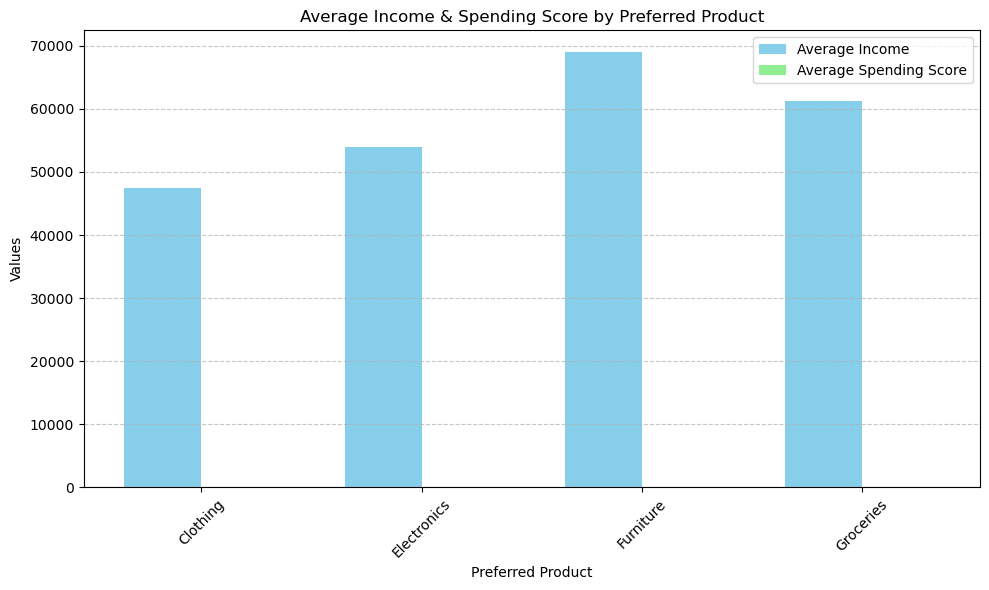

In [2]:
# 1. Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# 2. Create the dataset
data = {
    'Region': ['North', 'South', 'East', 'West', 'Central', 'North', 'South', 'East', 'West', 'Central'],
    'Age': [35, 42, 29, 50, 38, 33, 45, 31, 48, 36],
    'IncomeLevel': [55000, 62000, 48000, 70000, 59000, 53000, 64000, 47000, 68000, 60000],
    'PreferredProduct': ['Electronics', 'Groceries', 'Clothing', 'Furniture', 'Groceries', 
                         'Electronics', 'Groceries', 'Clothing', 'Furniture', 'Groceries'],
    'SpendingScore': [70, 85, 60, 90, 75, 68, 88, 58, 92, 77]
}

# 3. Convert to DataFrame
df = pd.DataFrame(data)

# 4. Group by PreferredProduct and calculate average Income and SpendingScore
product_summary = df.groupby('PreferredProduct')[['IncomeLevel', 'SpendingScore']].mean()

# 5. Plot a grouped bar chart
plt.figure(figsize=(10, 6))

bar_width = 0.35
index = np.arange(len(product_summary))

# Plot bars for IncomeLevel
plt.bar(index, product_summary['IncomeLevel'], bar_width, label='Average Income', color='skyblue')

# Plot bars for SpendingScore
plt.bar(index + bar_width, product_summary['SpendingScore'], bar_width, label='Average Spending Score', color='lightgreen')

# Add labels and title
plt.xlabel('Preferred Product')
plt.ylabel('Values')
plt.title('Average Income & Spending Score by Preferred Product')
plt.xticks(index + bar_width / 2, product_summary.index, rotation=45)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Show plot
plt.show()